In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Step 1: Load the dataset
df = pd.read_csv('/content/air_quality.csv')  # Replace with your actual filename

In [5]:
# Step 2: Define features and target
X = df[['pm25', 'no2', 'temperature']]
y = df['quality_level']

In [6]:
# Step 3: Encode categorical labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [7]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [8]:
# Step 5: Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Step 6: Predict on the test set
y_pred = clf.predict(X_test)

In [10]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

In [11]:
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

Accuracy : 0.35
Precision: 0.32
Recall   : 0.35
F1 Score : 0.32


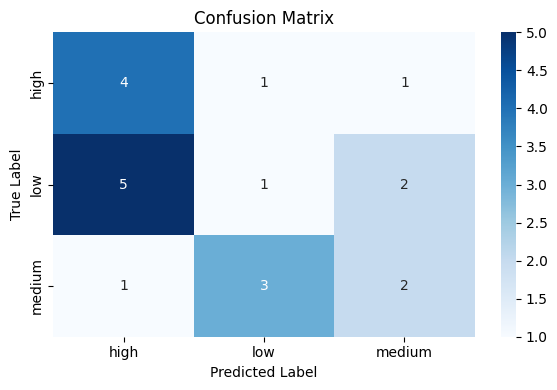

In [12]:
# Step 8: Confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
